In [1]:
import numpy as np
import networkx as nx
%matplotlib inline

In [3]:
from itertools import product

In [6]:
nodes = ['%i%i' % (i, j) for i, j in product(range(10), range(10))]

In [7]:
edges = []
for i, j in product(range(10), range(10)):
    if i > 0:
        edges.append(('%i%i' % (i, j), '%i%i' % (i-1, j)))
    if j > 0:
        edges.append(('%i%i' % (i, j), '%i%i' % (i, j-1)))
    if i < 9:
        edges.append(('%i%i' % (i, j), '%i%i' % (i+1, j)))
    if j < 9:
        edges.append(('%i%i' % (i, j), '%i%i' % (i, j+1)))

In [9]:
gridgraph = nx.Graph()
gridgraph.add_nodes_from(nodes)
gridgraph.add_edges_from(edges)

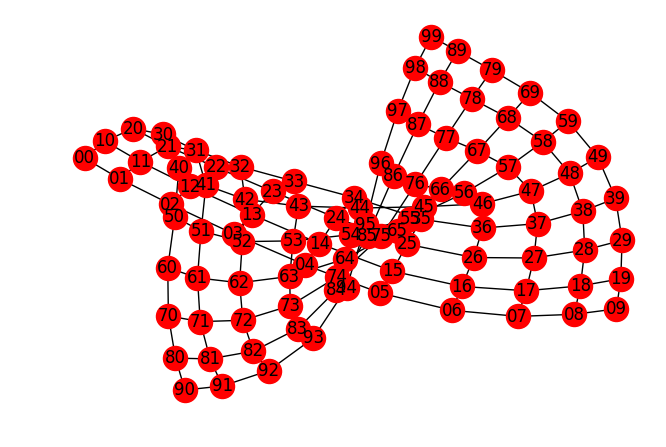

In [14]:
nx.draw(gridgraph, with_labels=True)

In [17]:
gridA = nx.adjacency_matrix(gridgraph)
gridA.toarray()

array([[0, 1, 0, ..., 0, 0, 0],
       [1, 0, 1, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 1, 0]])

In [18]:
gridB = nx.incidence_matrix(gridgraph)
gridB.toarray()

array([[1., 1., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [19]:
gridD = np.diag(np.sum(gridA.toarray(), axis=0))
gridD

array([[4, 0, 0, ..., 0, 0, 0],
       [0, 4, 0, ..., 0, 0, 0],
       [0, 0, 4, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 3, 0, 0],
       [0, 0, 0, ..., 0, 3, 0],
       [0, 0, 0, ..., 0, 0, 4]])

In [21]:
gridL = nx.laplacian_matrix(gridgraph, weight=False)
gridL.toarray()

array([[ 4, -1,  0, ...,  0,  0,  0],
       [-1,  4, -1, ...,  0,  0,  0],
       [ 0, -1,  4, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ...,  3,  0,  0],
       [ 0,  0,  0, ...,  0,  3, -1],
       [ 0,  0,  0, ...,  0, -1,  4]])

In [27]:
np.linalg.eig(gridL.toarray())

(array([ 7.80422607e+00,  7.52014702e+00,  7.23606798e+00,  6.79360449e+00,
        -2.41750470e-15,  7.07768354e+00,  7.07768354e+00,  9.78869674e-02,
         9.78869674e-02,  1.95773935e-01,  7.52014702e+00,  6.35114101e+00,
         6.52014702e+00,  6.79360449e+00,  3.81966011e-01,  3.81966011e-01,
         6.23606798e+00,  8.24429495e-01,  4.79852979e-01,  5.90211303e+00,
         6.52014702e+00,  6.23606798e+00,  4.79852979e-01,  5.79360449e+00,
         5.90211303e+00,  9.22316463e-01,  1.20639551e+00,  7.63932023e-01,
         5.61803399e+00,  8.24429495e-01,  1.64885899e+00,  9.22316463e-01,
         5.61803399e+00,  5.79360449e+00,  5.28407904e+00,  1.38196601e+00,
         1.20639551e+00,  5.17557050e+00,  5.00000000e+00,  2.00000000e+00,
         1.76393202e+00,  1.38196601e+00,  1.47985298e+00,  1.47985298e+00,
         5.28407904e+00,  5.23606798e+00,  5.17557050e+00,  5.00000000e+00,
         4.28407904e+00,  1.76393202e+00,  2.09788697e+00,  4.72654253e+00,
         2.0

In [25]:
gridnormL = np.matmul(np.matmul(np.sqrt(np.linalg.inv(gridD)), gridL.toarray()), np.sqrt(np.linalg.inv(gridD)))
gridnormL

array([[ 1.        , -0.25      ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.25      ,  1.        , -0.25      , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        , -0.25      ,  1.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  1.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         1.        , -0.28867513],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
        -0.28867513,  1.        ]])

In [29]:
lvals, lvecs = np.linalg.eig(gridnormL)

In [30]:
lvals

array([-3.46944695e-17,  6.03073792e-02,  2.00000000e+00,  2.85980083e-02,
        1.93969262e+00,  1.97140199e+00,  1.10476584e-01,  1.76502098e+00,
        1.76604444e+00,  1.88952342e+00,  1.85344460e+00,  1.97140199e+00,
        1.72281371e+00,  1.46555405e-01,  2.85980083e-02,  2.33955557e-01,
        1.10476584e-01,  1.46555405e-01,  1.88952342e+00,  1.85344460e+00,
        2.34979020e-01,  1.76502098e+00,  2.77186292e-01,  1.72281371e+00,
        1.50000000e+00,  1.63340697e+00,  2.34979020e-01,  1.61293822e+00,
        1.63340697e+00,  2.77186292e-01,  3.66593030e-01,  5.00000000e-01,
        1.56426513e+00,  1.61293822e+00,  3.87061781e-01,  3.66593030e-01,
        1.56426513e+00,  3.87061781e-01,  4.35734867e-01,  1.45045314e+00,
        1.39625887e+00,  1.47151214e+00,  1.47151214e+00,  4.35734867e-01,
        1.33702328e+00,  6.03741128e-01,  5.28487860e-01,  5.28487860e-01,
        5.49546864e-01,  5.49546864e-01,  1.45045314e+00,  1.39625887e+00,
        1.33702328e+00,  

In [31]:
lvecs

array([[-0.10540926,  0.02673847, -0.10540926, ...,  0.00160577,
        -0.00802671,  0.00449901],
       [-0.10540926, -0.02673847,  0.10540926, ..., -0.16281125,
        -0.14635114, -0.10971769],
       [-0.10540926, -0.07699036, -0.10540926, ...,  0.08445642,
         0.12046078, -0.08116378],
       ...,
       [-0.09128709, -0.13335122,  0.09128709, ...,  0.10664912,
        -0.07646384,  0.07463868],
       [-0.09128709,  0.13335122, -0.09128709, ...,  0.05299886,
         0.07497798, -0.0935735 ],
       [-0.10540926,  0.14469455,  0.10540926, ...,  0.06502219,
        -0.00022359,  0.20721625]])

In [32]:
lvecs[:, 99]

array([ 0.00449901, -0.10971769, -0.08116378, -0.00371284,  0.0935735 ,
       -0.20721625, -0.02883889, -0.08279321, -0.08685669, -0.07463868,
       -0.0049302 ,  0.02353237,  0.11569558,  0.21092909, -0.00449901,
        0.16897853,  0.10355036, -0.10775351, -0.02688558,  0.10971769,
       -0.0345318 , -0.05132139, -0.08685669,  0.03823772,  0.01938734,
       -0.12813588,  0.11374227, -0.20721625, -0.10355036, -0.02353237,
        0.0935735 , -0.12813315, -0.10082011, -0.05132139, -0.09460744,
       -0.07463868,  0.0049302 ,  0.10775351,  0.01938734, -0.02966353,
        0.09460744, -0.03823772,  0.13808215,  0.08279321, -0.11374227,
        0.12813315,  0.08116378,  0.15166825, -0.02688558,  0.16897853,
       -0.09460744,  0.03823772, -0.08116378, -0.15166825,  0.02688558,
       -0.16897853, -0.13808215, -0.08279321,  0.11374227, -0.12813315,
        0.10082011,  0.05132139, -0.01938734,  0.02966353,  0.09460744,
        0.07463868, -0.0049302 , -0.10775351, -0.0935735 ,  0.12